In [1]:
# shift + enter: executa a célula atual e vai para a próxima
# ctrl + enter : executa a célula atual e fica nela

print("hello world!") # Sanity check --- isso deve rodar sem problemas

hello world!


In [2]:
if False:
    !pip install pandas
    !pip install matplotlib
    !pip install numpy
    !pip install scikit-learn # instalamos com esse nome. Talvez precise
                              # reiniciar o kernel
    !pip install seaborn
    !pip install nbformat # Pode ser que seu plotly precise desse cara
    !pip install plotly

    # 1. se ! não funcionar, usar %
    # 2. Se !pip não funcionar, tente (trocando ! por % caso necessário):
    #   !pip3 install
    #   !python -m pip install
    #   !python3 -m pip install
    #   !conda install

import pandas            as pd
import plotly.express    as px
import matplotlib.pyplot as plt
import numpy             as np
import sklearn           as sk   # importamos com esse o scikit-learn
import seaborn           as sns

In [3]:
df = pd.read_csv('../aula3/gaf_esp.csv', sep=';', encoding='UTF-8')
# Aprendizado de máquina gosta de tabela!

# NaN = Not a Number

# Descomente o código abaixo e re-execute o notebook para ver o efeito que
# dados bagunçados teriam no modelo
# def shuffle(df, n=1, axis=0):
#     df = df.copy()
#     for _ in range(n):
#         df.apply(np.random.shuffle, axis=axis)
#     return df      
# df = shuffle(df)

df

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2
...,...,...,...
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0


# Análise exploratória

A ideia é explorar os dados procurando por problemas (_p.ex._ dados faltantes, _outliers_, leitura inválida de colunas); entender os tipos de dados (o que cada coluna é? categórica ou numérica? tem alguma coluna lida incorretamente?); e **pegar intimidade com os dados que vamos trabalhar**.

Ou seja, vamos ver se os dados prestam (afinal, _sh\*t in sh\*t out_), e tentar entender padrões por meio de visualizações e estatística descritiva.

In [4]:
df.info() # mostra informações de cada coluna da base

# Vemos se tem dados faltantes e decidimos o que fazer com eles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Espécie                  100 non-null    object 
 1   Comprimento do Abdômen   100 non-null    float64
 2   Comprimento das Antenas  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [5]:
# descartando dados faltantes (pois machine learning não gosta disso)
df = df.dropna() # precisamos sobrescrever df pois o pandas nunca trabalha
                 # inplace (ou seja, modificando a tabela original) --- na
                 # verdade, ele sempre retorna uma cópia com a modificação feita

In [6]:
df.describe() # mostra estatística descritiva de todas as colunas numéricas

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


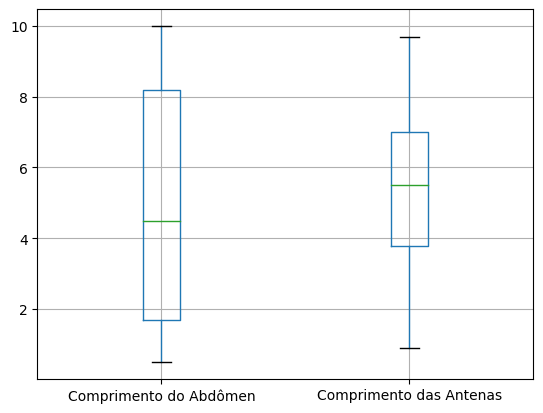

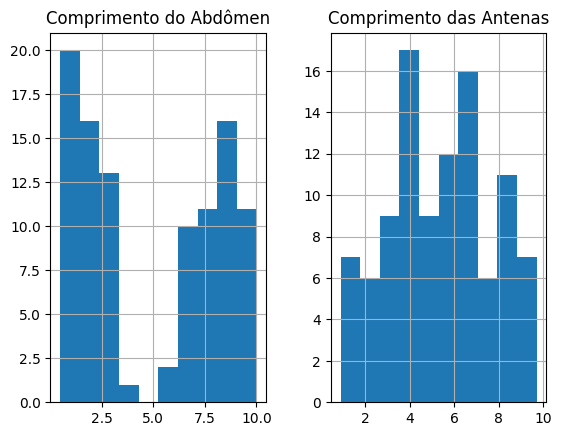

In [7]:
df.boxplot()
df.hist()
plt.show() # Idealmente precisamos chamar o plt.show() no final de toda célula 
           # que gera um gráfico, para dizer explicitamente que é para finalizar
           # a figura e mostrar o gráfico

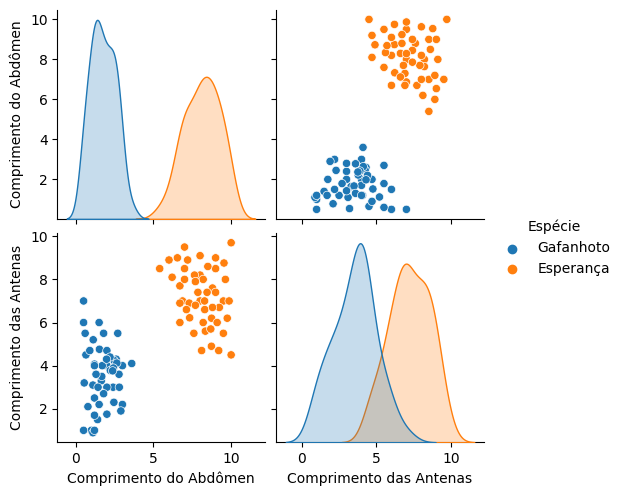

In [8]:
# Gráfico que o Guilherme leva no coração
sns.pairplot(df, hue='Espécie') # só gera pares entre colunas numéricas

# Salvando um gráfico em formato vetorizado:
# 1. gerar um gráfico 
# 2. chamar plt.savefig **logo após o gráfico
# (formatos suportados:
#   eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

plt.savefig('pairplotzinho.pdf') #extensão legald do vscode: vscode-pdf
plt.show()

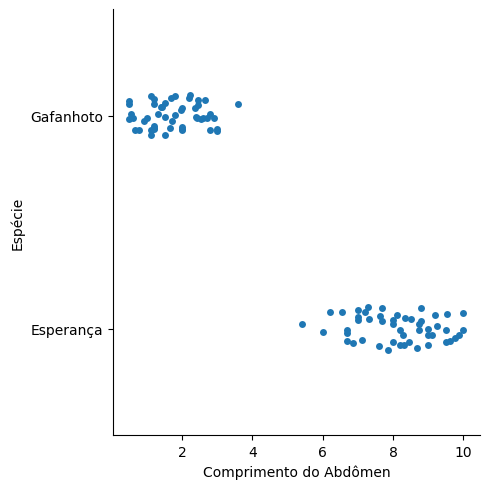

In [9]:
sns.catplot(data=df, 
    x='Comprimento do Abdômen',
    y='Espécie')
plt.show()

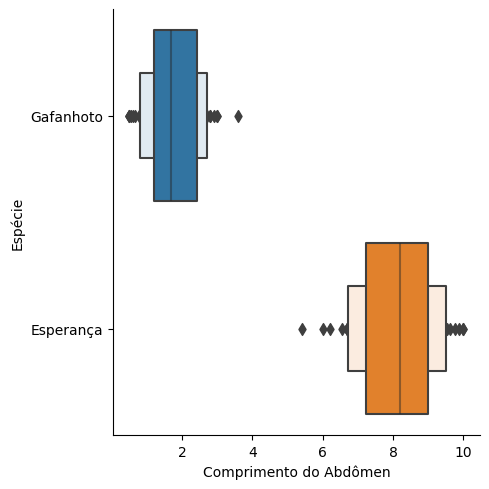

In [10]:
sns.catplot(data=df, 
    x='Comprimento do Abdômen',
    y='Espécie',
    kind='boxen')
plt.show()

In [11]:
fig = px.scatter(df, 
    x="Comprimento do Abdômen", y="Comprimento das Antenas", color="Espécie")
fig.show()

# Divisão em treino e teste

No aprendizado supervisionado, nós temos uma resposta que queremos que o modelo aprenda a predizer para uma entrada qualquer (que pode ter sido vista antes ou não).

Para treinar o modelo, precisamos fornecer a **supervisão**, que é a resposta esperada para exemplos de treino. O modelo irá aprender internamente um conjunto de correlações, e construirá uma representação interna, que será utilizada para fazer as predições que queremos.

Então, precisamos dizer QUEM, da nossa base de dados, é a entrada ($\mathbb{X}$) e a resposta esperada ($\mathbf{y}$).

In [12]:
df.columns # Vendo as colunas que tenho no DF

Index(['Espécie', 'Comprimento do Abdômen', 'Comprimento das Antenas'], dtype='object')

In [13]:
# Extrair UMA COLUNA: nome da coluna entre colchetes
df['Espécie']

0     Gafanhoto
1     Gafanhoto
2     Gafanhoto
3     Gafanhoto
4     Gafanhoto
        ...    
95    Esperança
96    Esperança
97    Esperança
98    Esperança
99    Esperança
Name: Espécie, Length: 100, dtype: object

In [14]:
# Extrair uma TABELA (para pegar só 1 coluna, passar só 1 coluna)
df1 = df.loc[ :, ('Comprimento do Abdômen', 'Comprimento das Antenas') ]
display(df1.sample(3, random_state=42))


# maneira alternativa (passar uma lista com nome dos atributos)
df2 = df[['Comprimento do Abdômen', 'Comprimento das Antenas']]
display(df2.sample(3))

,Comprimento do Abdômen,Comprimento das Antenas
83,8.74,6.2
53,5.40,8.5
70,7.00,8.0


,Comprimento do Abdômen,Comprimento das Antenas
9,1.20,1.0
25,1.12,5.2
55,9.50,5.5


In [15]:
# O que vamos usar de entrada geralmente é uma TABELA (mesmo que só com 1 coluna!)
X = df[['Comprimento do Abdômen', 'Comprimento das Antenas']]

# O que vamos predizer geralmente é coluna
y = df['Espécie']

# Se o y é a espécie, então é a coluna "espécie" que o modelo será treinado para predizer

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# df.shape é um atributo que contém as dimensões do dataframe
print("Tamanho original:", df.shape     )
print("Tamanho X_train :", X_train.shape)
print("Tamanho X_test  :", X_test.shape )
print("Tamanho y_train :", y_train.shape)
print("Tamanho y_test  :", y_test.shape )

Tamanho original: (100, 3)
Tamanho X_train : (70, 2)
Tamanho X_test  : (30, 2)
Tamanho y_train : (70,)
Tamanho y_test  : (30,)


# Treinamento do modelo

In [17]:
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree           import DecisionTreeClassifier

# clf é a convenção para nome de métodos de ML supervisionado de classificação.
# fit() é o método que faz o aprendizado de máquina aprender uma estrutura interna.
clf = KNeighborsClassifier().fit(X_train, y_train)
clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
clf = DecisionTreeClassifier().fit(X_train, y_train)

clf

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



DecisionTreeClassifier()

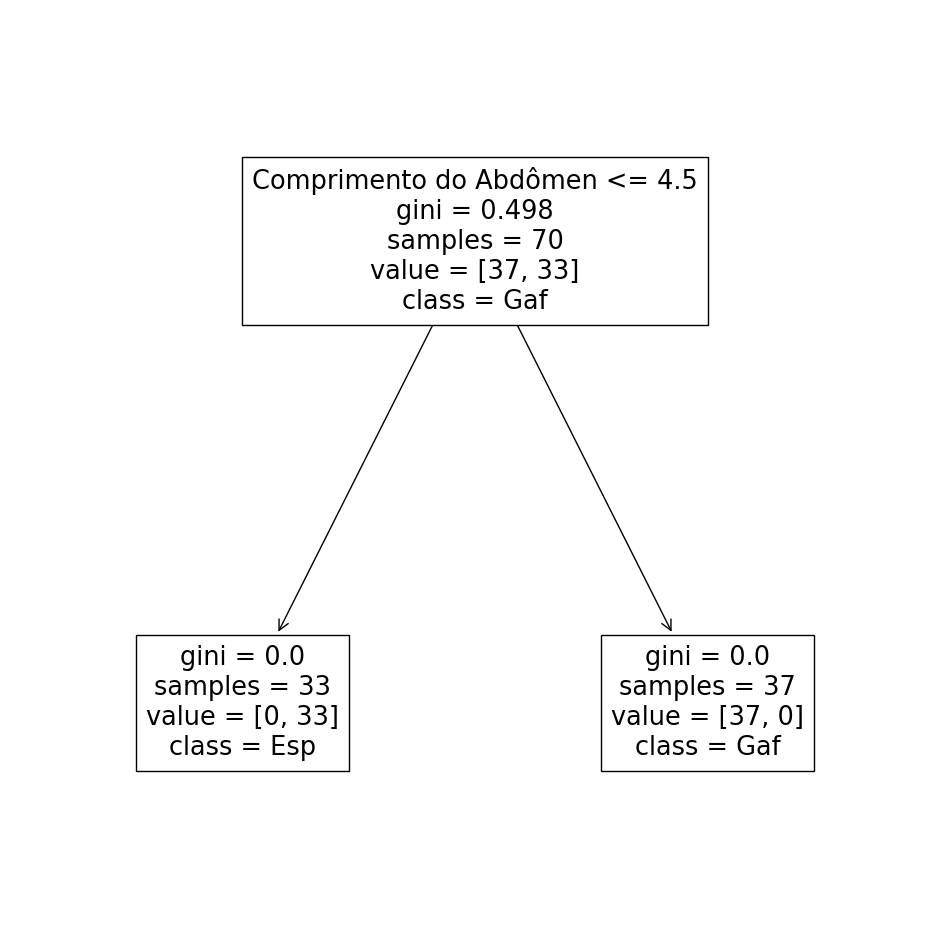

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))

# O ramo da esquerda corresponde a False
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Gaf', 'Esp']
)
plt.show()

# Validação do desempenho do modelo

In [19]:
X_amostra = X_test.sample()

display(X_amostra)

clf.predict(X_amostra)

,Comprimento do Abdômen,Comprimento das Antenas
77,9.0,7.4


array(['Esperança'], dtype=object)

In [20]:
y_pred = clf.predict(X_test)
y_pred

array(['Esperança', 'Esperança', 'Esperança', 'Gafanhoto', 'Gafanhoto',
       'Gafanhoto', 'Gafanhoto', 'Esperança', 'Gafanhoto', 'Gafanhoto',
       'Gafanhoto', 'Gafanhoto', 'Esperança', 'Gafanhoto', 'Esperança',
       'Gafanhoto', 'Esperança', 'Esperança', 'Gafanhoto', 'Gafanhoto',
       'Esperança', 'Esperança', 'Gafanhoto', 'Gafanhoto', 'Esperança',
       'Gafanhoto', 'Gafanhoto', 'Esperança', 'Gafanhoto', 'Esperança'],
      dtype=object)

In [21]:
from sklearn.metrics import accuracy_score

f"{accuracy_score(y_test, y_pred)*100}%"

'100.0%'